# Assignment-04-Simple Linear Regression-1

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']= 100

In [2]:
# import dataset
df=pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA and Data Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: >

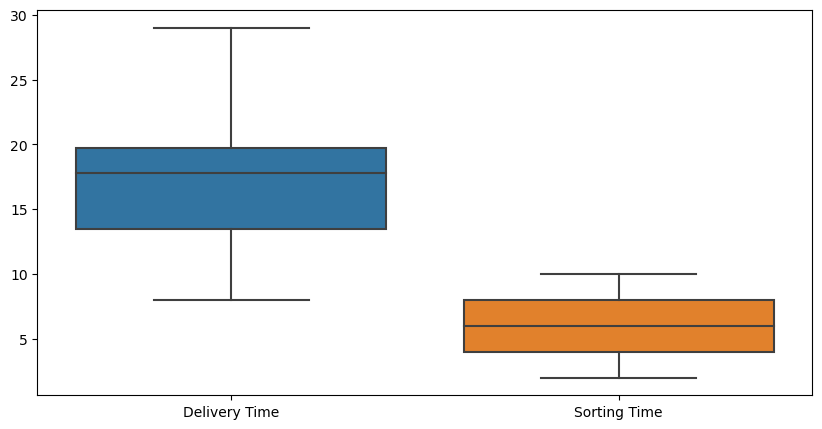

In [5]:
sns.boxplot(data=df)

<Axes: xlabel='Delivery Time', ylabel='Density'>

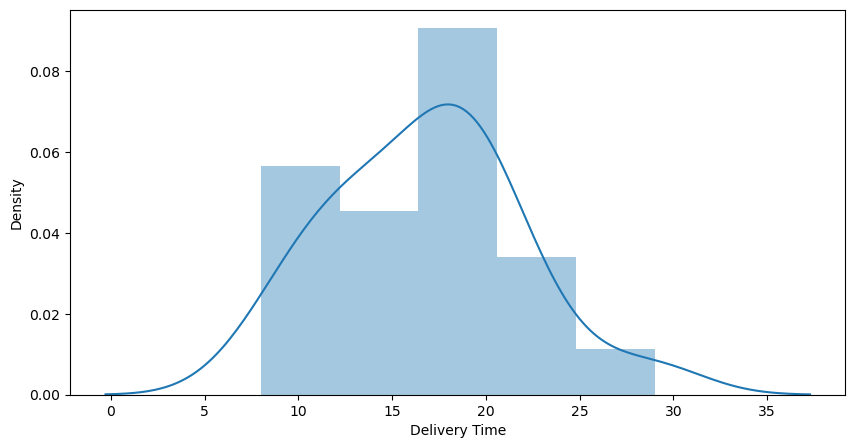

In [6]:
sns.distplot(df['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

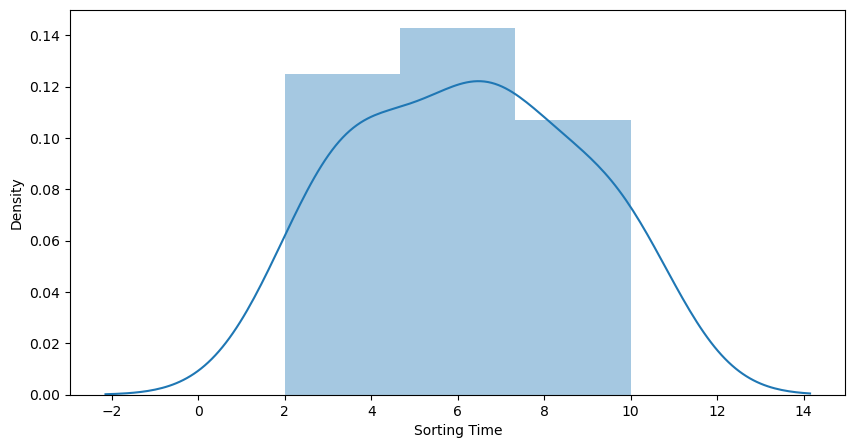

In [7]:
sns.distplot(df['Sorting Time'])

## Feature Engineering

In [8]:
# Renaming Columns
df1=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)


In [9]:
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Correlation Analysis

In [10]:
df1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

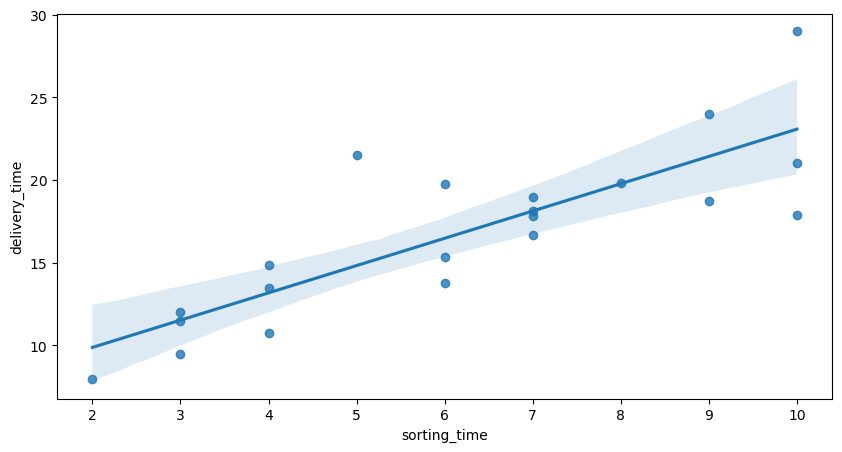

In [11]:
sns.regplot(x=df1['sorting_time'],y=df1['delivery_time'])

## Model Building

In [12]:
model=smf.ols("delivery_time~sorting_time",data=df1).fit()

## Model Testing

In [13]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [15]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Model Predictions

In [16]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [17]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [18]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [19]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Data transformation
    1.log
    2.sqrt

In [20]:
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


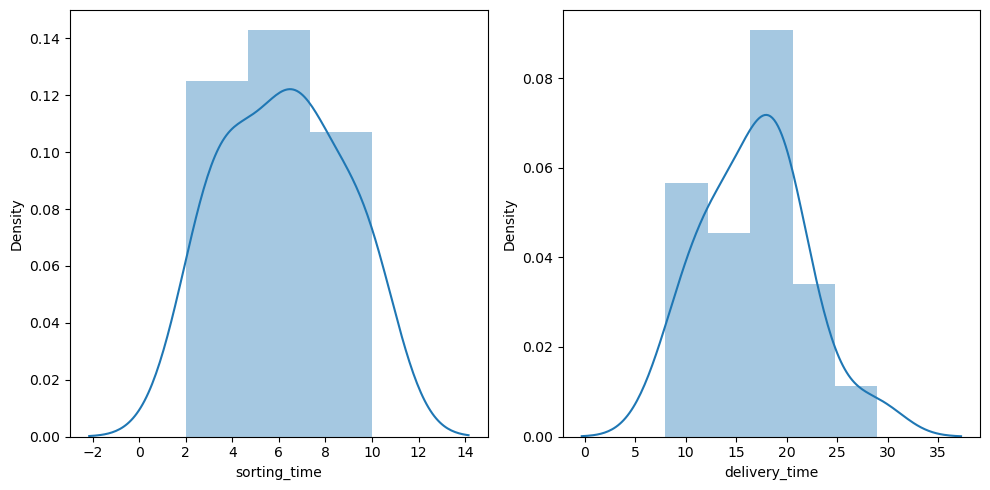

In [21]:
plt.subplot(1,2,1)
sns.distplot(df1['sorting_time'])

plt.subplot(1,2,2)
sns.distplot(df1['delivery_time'])

plt.tight_layout()

In [22]:
print('Skewness of sorting_time : ',df1['sorting_time'].skew())
print('Skewness of delivery_time : ',df1['delivery_time'].skew())

Skewness of sorting_time :  0.047115474210530174
Skewness of delivery_time :  0.3523900822831107


## Log Transformation

In [23]:
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [24]:
df1['log_sorting_time']=np.log(df1['sorting_time'])
df1['log_delivery_time']=np.log(df1['delivery_time'])

In [25]:
df1

,delivery_time,sorting_time,log_sorting_time,log_delivery_time
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296
5,15.35,6,1.791759,2.731115
6,19.00,7,1.945910,2.944439
7,9.50,3,1.098612,2.251292
8,17.90,10,2.302585,2.884801
9,18.75,9,2.197225,2.931194


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [27]:
x=df1[['log_sorting_time']]
y=df1[['log_delivery_time']]

In [28]:
x

,log_sorting_time
0,2.302585
1,1.386294
2,1.791759
3,2.197225
4,2.302585
5,1.791759
6,1.945910
7,1.098612
8,2.302585
9,2.197225


In [29]:
y

,log_delivery_time
0,3.044522
1,2.602690
2,2.983153
3,3.178054
4,3.367296
5,2.731115
6,2.944439
7,2.251292
8,2.884801
9,2.931194


In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [31]:
xtrain

,log_sorting_time
14,1.098612
16,1.791759
4,2.302585
2,1.791759
6,1.945910
7,1.098612
1,1.386294
13,1.098612
0,2.302585
20,1.609438


In [32]:
ytrain

,log_delivery_time
14,2.487404
16,2.621039
4,3.367296
2,2.983153
6,2.944439
7,2.251292
1,2.602690
13,2.442347
0,3.044522
20,3.068053


In [33]:
lr=LinearRegression()

In [34]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [35]:
ypred=lr.predict(xtest)

In [36]:
len(xtest)

5

In [37]:
len(ypred)

5

In [38]:
print('MSE Value : ',mean_squared_error(ytest,ypred))

MSE Value :  0.009807170074280242


In [39]:
print('RMSE Value : ',np.sqrt(mean_squared_error(ytest,ypred)))

RMSE Value :  0.09903115708846505


## sqrt Transformation

In [40]:
df1['sqrt_sorting_time']=np.sqrt(df1['sorting_time'])
df1['sqrt_delivery_time']=np.sqrt(df1['delivery_time'])

In [41]:
df1

,delivery_time,sorting_time,log_sorting_time,log_delivery_time,sqrt_sorting_time,sqrt_delivery_time
0,21.00,10,2.302585,3.044522,3.162278,4.582576
1,13.50,4,1.386294,2.602690,2.000000,3.674235
2,19.75,6,1.791759,2.983153,2.449490,4.444097
3,24.00,9,2.197225,3.178054,3.000000,4.898979
4,29.00,10,2.302585,3.367296,3.162278,5.385165
5,15.35,6,1.791759,2.731115,2.449490,3.917908
6,19.00,7,1.945910,2.944439,2.645751,4.358899
7,9.50,3,1.098612,2.251292,1.732051,3.082207
8,17.90,10,2.302585,2.884801,3.162278,4.230839
9,18.75,9,2.197225,2.931194,3.000000,4.330127


In [42]:
x=df1[['sqrt_sorting_time']]
y=df1[['sqrt_delivery_time']]

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [44]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [45]:
ypred=lr.predict(xtest)

In [46]:
len(ypred)

5

In [47]:
len(ytest)

5

In [48]:
print('MSE Value : ',mean_squared_error(ytest,ypred))

MSE Value :  0.04595549220093338


In [49]:
print('RMSE Value : ',np.sqrt(mean_squared_error(ytest,ypred)))

RMSE Value :  0.214372321443169
